# [WSI] Ćwiczenie nr 2
### Algorytmy ewolucyjne

Mikołaj Wewiór 318407


## pytania

-> funkcja dopasowania </br>
-> złożoność obliczeniowa - na dole pierwszej strony polecenia </br>
-> czy mutacja może dawać gorsze wyniki </br> 
-> czy krzyżowanie może tylko brać na współrzędną X tylko x1 lub x2 i analogicznie dla Y, czy to może być losowa kombinacja z listy [x1, y1, x2, y2] </br>

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

RAST_BOUNDS = [-5.12, 5.12]
GRIE_BOUNDS = [-50, 50]
DROP_BOUNDS = [-5.12, 5.12]

DIMENSIONS = 2
PLOT_STEPS = 400

ITERATIONS = 1000
POPULATION = 25
PC = 0
PM = 0.8
SIGMA = 0.7
ELITE_SUCCESSION = 1



In [160]:
class Function:

    def __init__(self, bounds, dimensions, global_optimum=0.0):
        self._name = None
        self._bounds = bounds
        self._dimensions = dimensions
        self._global_optimum = global_optimum


    def name(self):
        return self._name


    def dimension(self):
        return self._dimensions


    def bounds(self):
        return self._bounds

    def bound(self):
        return max(self.bounds())


    # def position(self):
    #     return self._current_position


    # def set_position(self, new_position):
    #     self._current_position = new_position


    # def beta(self):
    #     return self._beta


    # def set_beta(self, new_beta):
    #     self._beta = new_beta


    def global_optimum(self):
        return self._global_optimum


    # def grad(self, x_vector, i):
    #     return None

    def q(self):
        pass

    def update_position(self):
        pass
        # TODO

        # min_bound = self._bounds[0]
        # max_bound = self._bounds[1]
        # d = self.d()
        # x = copy.deepcopy(self.position())

        # for i in range(d):
        #     upd = self.beta()*self.grad(x, i)
        #     x[i] = x[i] - upd

        #     while x[i] > max_bound:
        #         diff = x[i] - max_bound
        #         x[i] = min_bound + diff
        #     while x[i] < min_bound:
        #         diff = x[i] - min_bound
        #         x[i] = max_bound + diff

        # self.set_position(x)
        # return x


In [161]:
class Rastrigin(Function):

    def __init__(self, bounds, dimensions):
        super().__init__(bounds, dimensions)
        self._name = "Rastrigin"

    # TODO

    def q(self, x_vector):
        d = self.dimension()
        partial_cost = lambda x: x**2 - 10*np.cos(2*np.pi*x)

        cost = 10*d
        for i in range(d) : cost += partial_cost(x_vector[i])

        return cost


    # def grad(self, x_vector, i):
    #     x = x_vector[i]
    #     gradient = 2*x +20*np.pi*np.sin(2*np.pi*x)
    #     return gradient


In [162]:
class Griewank(Function):

    def __init__(self, bounds, dimensions):
        super().__init__(bounds, dimensions)
        self._name = "Griewank"

    # TODO

    def q(self, x_vector):
        d = self.dimension()

        SUM = 0
        for i in range(d):
            SUM += x_vector[i]**2
        SUM = SUM / 4000

        PI = 1
        for i in range(d):
            PI = PI*np.cos(
                x_vector[i]*np.sqrt(i+1)/(i+1)
            )

        return SUM - PI + 1


    # def grad(self, x_vector, i):
    #     x = x_vector
    #     PI_rest = 1
    #     for j in range(self.d()):
    #         if j != i:
    #             PI_rest = PI_rest*np.cos(
    #                 x[j]*np.sqrt(j+1)/(j+1)
    #             )

    #     return x[i]/2000 + np.sin(x[i]*np.sqrt(i+1)/(i+1)) * PI_rest*np.sqrt(i+1)/(i+1)


In [163]:
class DropWave(Function):
    def __init__(self, bounds, dimensions, global_optimum=0.0):
        super().__init__(bounds, dimensions, global_optimum)
        self._name = "DropWave"

    # TODO

    def q(self, x_vector):
        d = self.dimension()

        square = 0
        for i in range(d):
            square += x_vector[i]**2

        numerator = 1 + np.cos(12*np.sqrt(square))
        denominator = 0.5 * square + 2

        return 1-numerator/denominator


In [164]:
class Quadratic(Function):

    def __init__(self, bounds, dimensions, global_optimum=0.0):
        super().__init__(bounds, dimensions, global_optimum)
        self._name = "Quadratic"


    def q(self, x_vector):
        d = self._dimensions

        cost = 0
        for i in range(d):
            cost += (x_vector[i])**2

        return cost

In [165]:
class Particle:
    def __init__(self, id: int, position: list, function: Function):
        self._id = id
        self._position = position
        self._function = function
        self._rank = None
        self.q = None

    def function(self):
        return self._function

    def id(self):
        return self._id

    def position(self):
        return self._position

    def value(self):
        return self.q

    def set_value(self):
        x = self.position()
        self.q = self.function().q(x)

    def set_rank(self, rank):
        self._rank = rank

    def rank(self):
        return self._rank

    def fix_position(self, index):
        i = index
        if self.position()[i] > self.function().bounds()[1]:
            return self.function().bounds()[1]
        if self.position()[i] < self.function().bounds()[0]:
            return self.function().bounds()[0]
        return self.position()[i]


    def print(self):
        print(f'{self.id()} | {self.position()} | {self.q} | {self.value()} | {self.function().name()}')

In [166]:
class Evolution:
    def __init__(self, function: Function, iterations: int, population_count: int, mutation_factor: float, crossing_factor: float, mutation_sigma: float = None, elite_succession : int = 1):

        def generate_population():
            bound = function.bound()
            population = []
            for id in range(population_count):
                x1 = np.random.uniform(-bound, bound)
                x2 = np.random.uniform(-bound, bound)
                particle = Particle(id+1, [x1, x2], function)
                particle.set_value()
                population.append(particle)
            return population

        self._function = function
        self._iterations = iterations
        self._population_count = population_count
        self._population = generate_population()
        self._mutation_factor = mutation_factor
        self._mutation_sigma = mutation_sigma
        self._crossing_factor = crossing_factor
        self._elite_successors = elite_succession
        self._best_fitness = None

    def function(self):
        return self._function

    def iterations(self):
        return self._iterations

    def population(self):
        return self._population

    def nominal_population_count(self):
        return self._population_count

    def current_population_count(self):
        return len(self.population())

    def pm(self):
        return self._mutation_factor

    def pc(self):
        return self._crossing_factor

    def sigma(self):
        return self._mutation_sigma

    def set_new_population(self, population):
        self._population = population

    def sort_population(self):
        self.population().sort(key = lambda p: p.value())

    def best_fitness(self):
        return self._best_fitness

    def set_best_fitness(self, best_fitness):
        self._best_fitness = best_fitness

    # def best_fitness(self):
    #     self.sort_population()
    #     return self.population[0]


    def fitness_func(self):
        # po prostu jakas funckja która uszereguje? oceni jakoś jakosć rozwiązań
        for particle in self.population(): particle.set_value()
        self.sort_population()
        best_fitness = self.population()[0]
        best_fitness.set_rank(1)
        best_value = best_fitness.value()
        for particle in self.population()[1::]:
            r = 1 + (particle.value() - best_value)**2
            particle.set_rank(r)
        self.set_best_fitness(best_fitness)
        # return sorted_population
        # sorted_population = self.population().sort(key = lambda p: p.value())
        # return sorted_population


    def crossover(self, first_parent: Particle):
        a = np.random.random()
        if a < self.pc():
            particle = Particle(first_parent.id(), [], self.function())
            second_parent = random.choise(self.population())
            possible_position = []

            # for parent in [first_parent, second_parent]:
            #     for d in range(self.function().dimension()):
            #         possible_position.append(parent.position()[d])

            for d in range(self.function().dimension()):
                possible_position.append([])
                for parent in [first_parent, second_parent]:
                    possible_position[d].append(parent.position()[d])

            for d in range(self.function().dimension()):
                new_pos = random.choice(possible_position[d])
                particle.position().append(new_pos)

        else:
            particle = first_parent

        return particle


    def mutation(self, particle: Particle):
        a = np.random.random()
        if a < self.pm():
            for i in range(self.function().dimension()):
                mut = self.sigma() * np.random.randn()
                particle.position()[i] += mut
                particle.position()[i] = particle.fix_position(i)



    def reproduction(self):
        reproduction = []
        # reproduction.append(self.best_fitness())
        while(len(reproduction) < self.nominal_population_count()-1):
            particle1 = random.choice(self.population())
            particle2 = random.choice(self.population())
            if particle1.rank() <= particle2.rank():
                reproduction.append(copy.deepcopy(particle1))
            else:
                reproduction.append(copy.deepcopy(particle2))
        self.set_new_population(reproduction)

    def succession(self):
        self.population().append(self.best_fitness())





    # inicjalizacja populacji
    # wartość funkcji dopasowania dla osobnika
    #   wybór osobników do krzyżowania
    #   krzyżowanie
    #   mutacja wybranych
    #   obliczenie wartości funkcji dopasowania dla każdego
    #   wybór nowej populacji



In [167]:
class Plotter:
    def __init__(self, function: Function, steps: int, bounds: list = None):
        self._function = function
        self._steps = steps
        self._dimensions = function.dimension()
        self._bounds = bounds


    def funciton(self):
        return self._function


    def name(self):
        return self.funciton().name()


    def d(self):
        return self._dimensions


    def steps(self):
        return self._steps


    def bounds(self):
        if self._bounds != None:
            return self._bounds
        return self.funciton().bounds()


    def q(self, x_vector):
        return self.funciton().q(x_vector)



    # def plot_route(self, route_x, route_y):
    #     plt.scatter(route_x[1:-1], route_y[1:-1])
    #     plt.plot(route_x, route_y)
    #     plt.scatter(route_x[0], route_y[0], color="white")
    #     plt.scatter(route_x[-1], route_y[-1], color="red")


    def plot(self, drow_online = False): #, route_x=None, route_y=None):
        step = self.steps()
        bounds = self.bounds()
        diff = bounds[1] - bounds[0]
        Z = np.zeros((step+1, step+1))
        for i in range(step+1):
            y = bounds[0] + i*diff/step
            for j in range(step+1):
                x = bounds[0] + j*diff/step
                Z[i][j] = self.q([x, y])

        x = np.linspace(bounds[0], bounds[1], step+1)
        y = np.linspace(bounds[0], bounds[1], step+1)

        X, Y = np.meshgrid(x, y)

        plt.figure()
        plt.ion()

        contour = plt.contourf(X, Y, Z, cmap="plasma", levels=100)
        cbar = plt.colorbar(contour)
        cbar.set_label("Function value")

        plt.grid(True)
        plt.xlabel("x1")
        plt.ylabel("x2", rotation=0)

        # if not (route_x == None or route_y == None):
        #     self.plot_route(route_x, route_y)

        if not drow_online:
            plt.show()


    def draw_online(self, evolution: Evolution):
        plt.ion()

        # draw_grid(min_bound, max_bound, fun)
        self.plot(drow_online=True)

        # Wyświetlenie punktów
        X = []
        Y = []
        best_fitnesses = evolution.best_fitness().position()
        for particle in evolution.population():
            X.append(particle.position()[0])
            Y.append(particle.position()[1])
        plt.scatter(X, Y, c="w", marker=".")
        plt.scatter(best_fitnesses[0], best_fitnesses[1], c="g", marker="*")
        # plot_points = plt.scatter(X, Y, c="w", marker=".")
        # plot_best_point = plt.scatter([], [], c="g", marker="o")

        plt.show()
        # return plot_points, plot_best_point

In [168]:
class Experiment:
    def __init__(self, function, iterations: int, step: float, experiment_domain: float, epsilon: float, show: bool):
        self._function = function
        self._iterations = iterations
        self._step = step
        self._domain = experiment_domain
        self._epsilon = epsilon
        self._show = show


    def test_function(self):
        return self._function


    def iterations(self):
        return self._iterations


    def step(self):
        return self._step


    def domain(self):
        return self._domain


    def epsilon(self):
        return self._epsilon


    def show_flag(self):
        return self._show


    def specify_function(self, function, x=None,  beta=None, MSE=False):
        if x != None:
            function.set_position(x)
        if beta != None:
            function.set_beta(beta)


    def plot(self, data, xlabel, scatter=False):
        X = data[0]
        Y = data[1::]
        plt.figure()
        plt.grid(True)
        for y in Y: plt.plot(X, y)
        if scatter:
            for y in Y: plt.scatter(X, y, c='#ff7f0e')
        plt.ylabel("Error")
        plt.xlabel(xlabel)
        plt.show()


    def beta_experiment(self, init_points, MSE=False):
        beta_and_qs = []
        for _ in range(len(init_points)+1): beta_and_qs.append([])

        int_range = int(self.domain() / self.step())

        for i in range(int_range+1):

            beta = (i+1)*self.step()
            beta_and_qs[0].append(beta)

            for t in range(len(init_points)):
                test_func = self.test_function()
                self.specify_function(test_func, init_points[t], beta)

                test = Test(self.iterations(), test_func, self.epsilon())
                route_x, route_y, route_q = test.do_test()

                if MSE:
                    error = route_q[-1]**2
                else:
                    error = abs(route_q[-1])

                beta_and_qs[t+1].append(error)

        if self.show_flag():
            self.plot(beta_and_qs, xlabel="Beta")

        return beta_and_qs


    def initial_position_experiment(self, inits_count, beta, distribution_bound, MSE=False):
        xy_results = [[], [], []]
        # bound = self.test_function().bounds()[1]

        for _ in range(inits_count):

            # x1 = np.random.uniform(-bound, bound)
            # x2 = np.random.uniform(-bound, bound)
            # x2 = np.random.normal(0, 3.0, 1)
            # x1 = np.random.normal(0, 3.0, 1)
            X = get_truncated_normal(0, 4, -distribution_bound, distribution_bound)
            x1 = X.rvs()
            x2 = X.rvs()
            position = [x1, x2]
            norm = np.sqrt(x1**2 + x2**2)

            xy_results[0].append(position)
            xy_results[1].append(norm)

            test_func = self.test_function()
            self.specify_function(test_func, position, beta)

            test = Test(self.iterations(), test_func, self.epsilon())
            route_x, route_y, route_q = test.do_test()

            if MSE:
                error = route_q[-1]**2
            else:
                error = abs(route_q[-1])

            xy_results[2].append(error)

        zipped = list(zip(xy_results[1], xy_results[2]))
        dist_q = sorted(zipped, key = lambda x: x[0])
        xs_and_qs = [
            [i for i, j in dist_q],
            [j for i, j in dist_q]
        ]

        if self.show_flag():
            self.plot(xs_and_qs, xlabel="Distance from global optimum", scatter=True)

        return xs_and_qs



In [169]:
DO = False

if DO:
    DropwavePlot = Plotter(DropWave(DROP_BOUNDS, DIMENSIONS), PLOT_STEPS)
    DropwavePlot.plot()



 0
1.8400638687815127

 1
0.46968241024294605

 2
0.46968241024294605

 3
0.4385413757824578

 4
0.09598937188216528

 5
0.06671712859819004

 6
0.06671712859819004

 7
0.056874685028007334

 8
0.056874685028007334

 9
0.0023006260513433793

 10
0.0023006260513433793

 11
0.0023006260513433793

 12
0.0007462188220755592

 13
0.0007462188220755592

 14
0.0007462188220755592

 15
0.0007462188220755592

 16
0.0007462188220755592

 17
0.0007462188220755592

 18
0.0007462188220755592

 19
0.0007462188220755592

 20
0.0007462188220755592

 21
0.0007462188220755592

 22
0.0007462188220755592

 23
0.0007462188220755592

 24
0.0007462188220755592

 25
0.0007462188220755592

 26
0.0007462188220755592

 27
0.0007462188220755592

 28
0.0007462188220755592

 29
0.0007462188220755592

 30
0.0007462188220755592

 31
0.0007462188220755592

 32
0.0007462188220755592

 33
0.0007462188220755592

 34
0.0007462188220755592

 35
0.0007462188220755592

 36
0.0007462188220755592

 37
0.0007462188220755592

 

0.0007462188220755592

 47
0.0007462188220755592

 48
0.0007462188220755592

 49
0.0007462188220755592

 50
0.0007462188220755592

 51
0.0007462188220755592

 52
0.0007462188220755592

 53
0.0007462188220755592

 54
0.0007462188220755592

 55
0.0007462188220755592

 56
0.0007462188220755592

 57
0.0007462188220755592

 58
0.0007462188220755592

 59
0.0007462188220755592

 60
0.0007462188220755592

 61
0.0007462188220755592

 62
0.0007462188220755592

 63
0.0007462188220755592

 64
0.0007462188220755592

 65
0.0007462188220755592

 66
0.0007462188220755592

 67
0.0007462188220755592

 68
0.0007462188220755592

 69
0.0007462188220755592

 70
0.0007462188220755592

 71
0.0007462188220755592

 72
0.0007462188220755592

 73
0.0007462188220755592

 74
0.0007462188220755592

 75
0.0007462188220755592

 76
0.0007462188220755592

 77
0.0007462188220755592

 78
0.0007462188220755592

 79
0.0007462188220755592

 80
0.0007462188220755592

 81
0.0007462188220755592

 82
0.0007462188220755592

 83
0

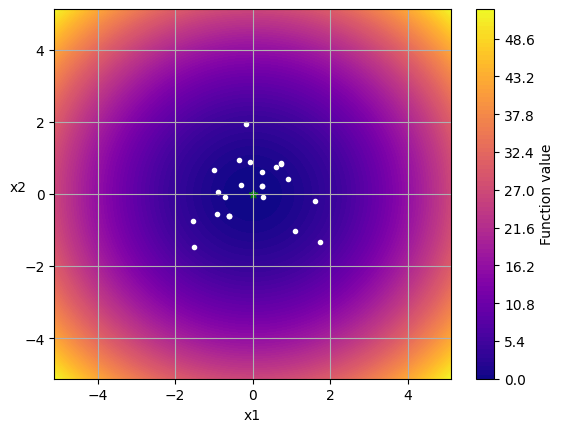

In [171]:
# pop = Evolution(Griewank(GRIE_BOUNDS, DIMENSIONS), ITERATIONS, POPULATION, PM, PC, SIGMA)
# pop.fitness_func()
# for particle in pop.population():
#     print(f'x1, x2 = ({particle.position()}), q = {particle.value()}')

# post_mut_pop = copy.deepcopy(pop)
# for particle in post_mut_pop.population():
#     post_mut_pop.mutation(particle)

# differents = []
# for i in range(POPULATION):
#     part = pop.population()[i]
#     mut_part = post_mut_pop.population()[i]
#     delta = part.position()[0] - mut_part.position()[0]
#     if delta > 0.01:
#         differents.append(i)
#     print(f'x1, x2 = {part.position()} | {mut_part.position()},\t q = {part.value()} | {mut_part.value()}')

# print(differents)



# p1 = Particle(1, [1.1, -0.3], Griewank([-5, 5], 2))
# p2 = Particle(2, [0.0, -0.1], Griewank([-5, 5], 2))
# p3 = Particle(3, [2.0,  0.0], Griewank([-5, 5], 2))

# population = [p1, p2, p3]

# for p in population:
#     p.print()
# print('\n')

# for p in population:
#     p.set_value()
#     p.print()
# print('\n')

# population.sort(key = lambda x: x.value())

# for p in population:
#     p.print()



testfu = Quadratic(DROP_BOUNDS, DIMENSIONS)
pop = Evolution(testfu, ITERATIONS, POPULATION, PM, PC, SIGMA)
plot = Plotter(testfu, PLOT_STEPS)
best_fitnesses = []
t = 0
while t < pop.iterations():
    # plot.draw_online(pop)
    print('\n', t)
    pop.fitness_func()
    pop.reproduction()
    for particle in pop.population():
        pop.crossover(particle)
        pop.mutation(particle)
    pop.succession()

    best_fitnesses.append(pop.best_fitness().value())
    print(pop.best_fitness().value())
    t += 1
plot.draw_online(pop)
    # TRZEBA POPRAWIĆ TO ŻE WARTOŚCI NIE SĄ NIEOSNĄCE PO KAŻDEJ ITERACJI

